Initialization


In [1]:
import os
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


**Data Preparation**



In [2]:
train_dir =  'train'
validation_dir = 'valid'
test_dir = 'test'
num_train = 591
num_valid = 148
num_test = 184
batch_size = 7
# Generate train data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # resizing the images
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150), # resizing the images
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')





Found 591 images belonging to 2 classes.
Found 148 images belonging to 2 classes.
Found 184 images belonging to 2 classes.


**Building the Model**

In [3]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


**Training**


Instructions for updating:
Use tf.cast instead.
Epoch 1/30
84/84 [==============================] - 276s 3s/step - loss: 0.8144 - acc: 0.6480 - val_loss: 0.7543 - val_acc: 0.5646
Epoch 2/30
84/84 [==============================] - 265s 3s/step - loss: 0.5240 - acc: 0.7409 - val_loss: 0.8931 - val_acc: 0.6028
Epoch 3/30
84/84 [==============================] - 270s 3s/step - loss: 0.5085 - acc: 0.7613 - val_loss: 0.3752 - val_acc: 0.8582
Epoch 4/30
84/84 [==============================] - 266s 3s/step - loss: 0.4222 - acc: 0.8169 - val_loss: 0.2726 - val_acc: 0.9007
Epoch 5/30
84/84 [==============================] - 270s 3s/step - loss: 0.3619 - acc: 0.8367 - val_loss: 0.4202 - val_acc: 0.8369
Epoch 6/30
84/84 [==============================] - 266s 3s/step - loss: 0.3676 - acc: 0.8452 - val_loss: 0.7619 - val_acc: 0.6738
Epoch 7/30
84/84 [==============================] - 274s 3s/step - loss: 0.3266 - acc: 0.8605 - val_loss: 0.3757 - val_acc: 0.8298
Epoch 8/30
84/84 [=================

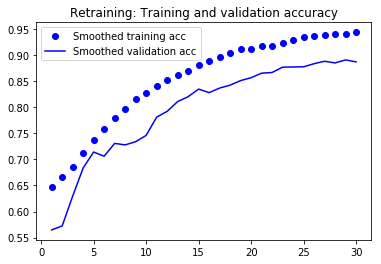

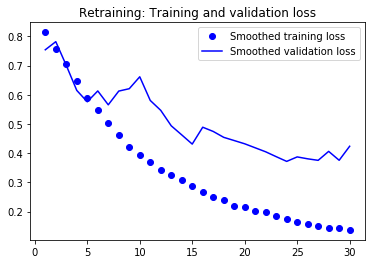

In [4]:

conv_base.trainable = False # Freeze the VGG-16 base layers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch  = max(1, num_train//batch_size),
    epochs=30,
    validation_data=validation_generator,
    validation_steps = max(1, num_valid//batch_size)
    )

## Display the training loss and accuracy

# Smoothing the plot using moving average
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Retraining: Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Retraining: Training and validation loss')
plt.legend()
plt.show()

In [5]:
model.save('Spill-Classificationstage1.h5')

In [6]:
model.load_weights('Spill-Classificationstage1.h5')

**Fine-Tuning**

Epoch 1/30
84/84 [==============================] - 513s 6s/step - loss: 0.7577 - acc: 0.8282 - val_loss: 0.5313 - val_acc: 0.8865
Epoch 2/30
84/84 [==============================] - 21512s 256s/step - loss: 0.3069 - acc: 0.8957 - val_loss: 0.6387 - val_acc: 0.8156
Epoch 3/30
84/84 [==============================] - 499s 6s/step - loss: 0.2264 - acc: 0.9354 - val_loss: 0.2349 - val_acc: 0.9362
Epoch 4/30
84/84 [==============================] - 516s 6s/step - loss: 0.1657 - acc: 0.9320 - val_loss: 0.7803 - val_acc: 0.8231
Epoch 5/30
84/84 [==============================] - 499s 6s/step - loss: 0.1437 - acc: 0.9558 - val_loss: 0.5605 - val_acc: 0.8582
Epoch 6/30
84/84 [==============================] - 500s 6s/step - loss: 0.1423 - acc: 0.9558 - val_loss: 0.4442 - val_acc: 0.9149
Epoch 7/30
84/84 [==============================] - 502s 6s/step - loss: 0.1102 - acc: 0.9688 - val_loss: 0.6899 - val_acc: 0.8865
Epoch 8/30
84/84 [==============================] - 500s 6s/step - loss: 0.1102

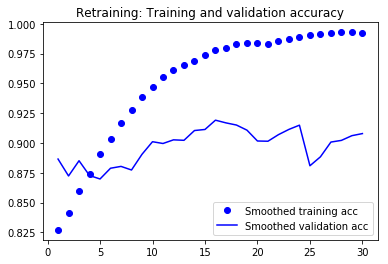

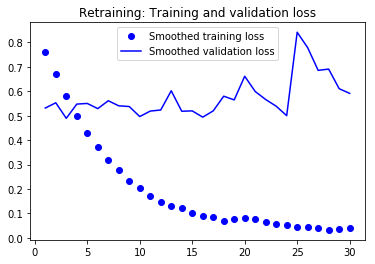

In [7]:
conv_base.trainable = True # Freeze the VGG-16 base layers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch  = max(1, num_train//batch_size),
    epochs=30,
    validation_data=validation_generator,
    validation_steps = max(1, num_valid//batch_size)
    )

## Display the training loss and accuracy

# Smoothing the plot using moving average
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Retraining: Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Retraining: Training and validation loss')
plt.legend()
plt.show()

model.save('Spill-Classification.h5')

**Testing**

In [8]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=max(1, num_test//batch_size))
print('test acc:', test_acc)
print('test loss:', test_loss)

test acc: 0.9450549483299255
test loss: 0.27921707831984904


**Get Confusion Matrix**


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import cv2, os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model, Model

model = load_model('Spill-Classification.h5')

target_size = (150,150)

test_dir = 'test'
num_test = 184

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=1,
    shuffle=False,
    class_mode='binary')

Y_pred = model.predict_generator(test_generator, steps=num_test)
y_pred = Y_pred > 0.5

print('Confusion Matrix')
y_test = test_generator.classes
print(confusion_matrix(y_test, y_pred))

Found 184 images belonging to 2 classes.
Confusion Matrix
[[83  1]
 [10 90]]
